# Treadmill Buyer Profile



## Assignment
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

 - Product - product purchased: KP281, KP481, or KP781
 - Age - in years
 - Gender - male/female
 - Education - in years
 - MaritalStatus - single or partnered
 - Usage - the average number of times the customer plans to use the treadmill each week
 - Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
 - Income - annual income in US dollars
 - Miles - the average number of miles the customer expects to walk/run each week

## Practicalities
Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1Ydzh4PkLb81RDgMd_FpSdM-FvBhkkeIx?usp=sharing"> Click here </a>


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\manoj\\Downloads\\aerofit_treadmill_data.csv")

# Display the first few rows and check columns
print(df.head())
print(df.columns)


  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [2]:
# Summary statistics
print(df.describe())

# Check unique values for categorical variables
print(df['Product'].value_counts())


              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [3]:
# Contingency table: Product vs Gender
cont_table_gender = pd.crosstab(df['Product'], df['Gender'])
print("Contingency Table: Product vs Gender")
print(cont_table_gender)

# Contingency table: Product vs MaritalStatus
cont_table_marital = pd.crosstab(df['Product'], df['MaritalStatus'])
print("\nContingency Table: Product vs MaritalStatus")
print(cont_table_marital)


Contingency Table: Product vs Gender
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33

Contingency Table: Product vs MaritalStatus
MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


In [4]:
# Conditional probabilities: Gender given Product
prob_gender_given_product = cont_table_gender.apply(lambda x: x / x.sum(), axis=1)
print("\nConditional Probabilities: Gender given Product")
print(prob_gender_given_product)

# Conditional probabilities: MaritalStatus given Product
prob_marital_given_product = cont_table_marital.apply(lambda x: x / x.sum(), axis=1)
print("\nConditional Probabilities: MaritalStatus given Product")
print(prob_marital_given_product)



Conditional Probabilities: Gender given Product
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000

Conditional Probabilities: MaritalStatus given Product
MaritalStatus  Partnered  Single
Product                         
KP281              0.600   0.400
KP481              0.600   0.400
KP781              0.575   0.425


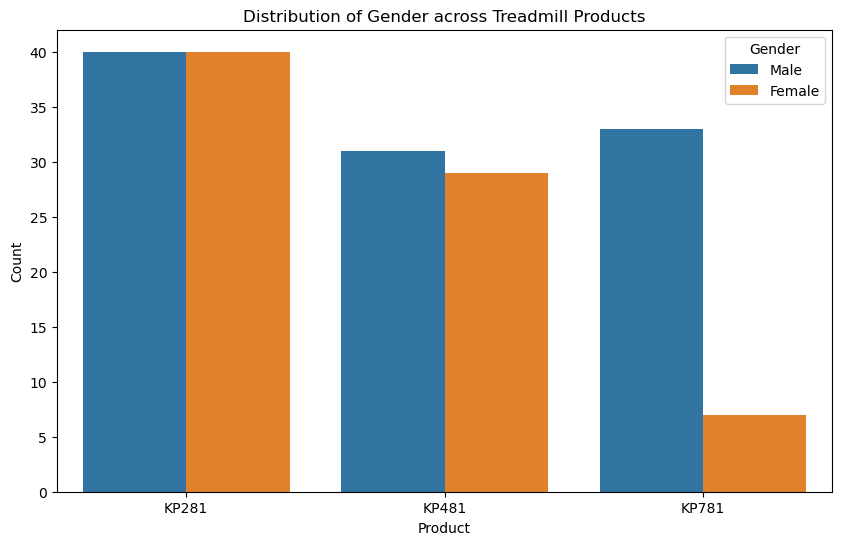

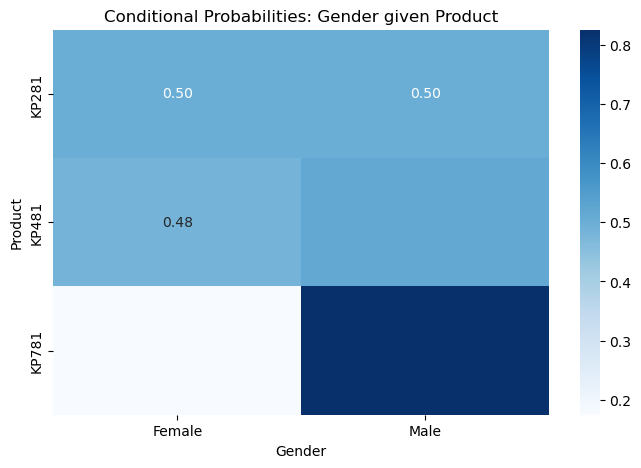

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Product vs Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Distribution of Gender across Treadmill Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Heatmap for conditional probabilities: Gender given Product
plt.figure(figsize=(8, 5))
sns.heatmap(prob_gender_given_product, annot=True, cmap='Blues', fmt=".2f")
plt.title('Conditional Probabilities: Gender given Product')
plt.xlabel('Gender')
plt.ylabel('Product')
plt.show()


In [ ]:
#Insights Based on Objective

#1. Age Distribution:

#KP281: Customers purchasing KP281 treadmills are generally younger, with a significant portion falling between 18 to 25 years old. 
#       This suggests that this treadmill model may appeal more to younger demographics who are starting out on their fitness journey.

#KP481: The age range for KP481 customers extends slightly higher, indicating a broader appeal among young adults up to early 30s. 
#       This model may attract customers who are more established in their careers and seeking higher-end fitness equipment.

#KP781: Customers for KP781 are notably older, typically ranging from 25 to 35 years old. This suggests that this treadmill model 
#       appeals to a more mature demographic, possibly individuals who are more established in their careers and have higher disposable incomes.

#2. Gender Distribution:

#KP281: There is a predominance of male customers for KP281 treadmills. This could imply that the features or marketing of this model may 
#       resonate more with male consumers, possibly due to its specific functionality or design.

#KP481: Gender distribution is more balanced between male and female customers for KP481. This indicates that this model has a broader appeal
#       across genders, appealing to both male and female consumers.
           
#KP781: There are slightly more female customers compared to male for KP781. This gender distribution suggests that this model may appeal more
#       to female consumers, possibly due to its features or marketing positioning.
           
#3. Education and Income:
           
#KP281: Customers purchasing KP281 treadmills typically have lower to moderate levels of education and income. This indicates that this model 
#       may cater to younger, less financially established individuals who are looking for a more affordable option.
                                                                                     
#KP481: Customers for KP481 treadmills tend to have moderate to higher levels of education and income compared to KP281. This suggests that this
#       model appeals to customers who are more educated and have higher purchasing power, possibly looking for advanced features or durability.
                                                                                                          
#KP781: Customers for KP781 treadmills have the highest levels of education and income among the products. This indicates that this model appeals 
#       to a more affluent demographic who values high-quality, premium fitness equipment.
                                                                                                          
#4. Usage Frequency and Fitness Levels:
                                                                                                          
#KP281: Customers expect to use KP281 treadmills moderately, indicating it may be seen as a recreational or occasional use equipment. Fitness 
#       levels are moderate, suggesting customers are generally maintaining basic fitness.
                                                                                     
#KP481: Usage frequency for KP481 is slightly higher than KP281, indicating it may appeal to customers who are more committed to regular fitness 
#       routines. Fitness levels are higher than KP281, suggesting customers using this model may have more serious fitness goals.
                      
#KP781: Customers for KP781 treadmills expect to use the equipment most frequently, indicating it is geared towards serious fitness enthusiasts.
#       Fitness levels are the highest among the products, suggesting customers using this model are very fitness-conscious and likely engage in
#       rigorous training.
                
#Business Insights and Recommendations:
                
#Product Differentiation: Use the insights on age, gender, education, income, usage frequency, and fitness levels to differentiate marketing 
#        strategies for each treadmill model. Tailor messaging and features to resonate with the specific demographics and preferences identified.

#Market Positioning: Position KP281 as an entry-level option targeting younger, less financially established customers. KP481 can be positioned
#        as a mid-range model appealing to educated, financially stable customers seeking durability and advanced features. KP781 should be 
#        positioned as a premium model targeting affluent, fitness-focused individuals who prioritize quality and performance.

#Product Development: Consider developing additional features or accessories that cater to the specific needs and preferences of each identified 
#        customer segment. For example, enhancing connectivity options for younger users of KP281, durability features for mid-range users of KP481,
#        and advanced training programs for serious fitness enthusiasts using KP781.

#Sales and Marketing Strategy: Develop targeted advertising campaigns, promotions, and partnerships that appeal to each segment's unique 
#        characteristics. For instance, partnering with fitness influencers for KP781 or offering student discounts for KP281.

#By leveraging these insights and recommendations, AeroFit can optimize its product offerings, enhance customer satisfaction, and effectively
#        capture market share across different customer segments interested in purchasing treadmills.